In [1]:
import numpy as np
import pandas as pd
import csv

In [3]:
"""
Module to replace the scipy.stats functions skew(), kurtosis() and bootstrap().
Imports numpy.

@author: napi
"""

""" Module to provide three functions:
    skew to compute the skewness of a distribution
    kurtosis to compute the kurtosis of a distribution
    bootstrap to bootstrap errors of statistical values, like std. dev
"""

import numpy as np


def skew(dist):
    """ Calculates the centralised and normalised skewness of dist. """
    
    # calculates average and std, dev for centralising and normalising
    aver = np.mean(dist)
    std = np.std(dist)
    
    # now calculate the skewness
    value = np.sum(((dist-aver) / std)**3) / len(dist-2)
    
    return value


def kurtosis(dist):
    """ Calculates the centralised and normalised excess kurtosis of dist. """
    
    # calculates average and std, dev for centralising and normalising
    aver = np.mean(dist)
    std = np.std(dist)
    
    # now calculate the kurtosis
    value = np.sum(((dist-aver) / std)**4) / len(dist-3) - 3.0
    
    return value


def bootstrap(dist, function, confidence_level=0.90, nboot=10000):
    """ Carries out a bootstrap of dist to get the uncertainty of statistical
    function applied to it. Dist can be a numpy array or a pandas dataseries.
    confidence_level specifies the quantile (defaulted to 0.90). E.g 0.90
    means the quantile from 0.05 to 0.95 is evaluated. confidence_level=0.682
    gives the range corresponding to 1 sigma, but evaluated using the 
    corresponding quantiles.
    nboot (default 10000) is the number of bootstraps to be evaluated. 
    Returns the lower and upper quantiles. 
    A call of the form
    low, high = bootstrap(dist, np.mean, confidence_level=0.682)
    will return the lower and upper limits of the 1 sigma range"""
    
    fvalues = np.array([]) # creates an empty array to store function values
    dlen = len(dist)
    for i in range(nboot):
        rand = np.random.choice(dist, dlen, replace=True)
        f = function(rand)
        fvalues = np.append(fvalues, f)
        
    # lower and upper quantiles
    qlow = 0.5 - confidence_level/2.0
    qhigh = 0.5 + confidence_level/2.0

    low = np.quantile(fvalues, qlow)
    high = np.quantile(fvalues, qhigh)
    
    return low, high


# checks whether module is imported or run directly.
# code is not executed if imported
if __name__ == "__main__":
    
    dist = np.random.normal(4.0, 3.0, 10000)
    
    print("skewness =", np.round(skew(dist), 6))
    print("kurtosis =", np.round(kurtosis(dist), 6))
    
    print()
    # Call the boostrap routine with statistical functions
    low, high = bootstrap(dist, np.mean, confidence_level=0.682)
    sigma = 0.5 * (high - low)
    print("average = ", np.round(np.mean(dist), 4), "+/-", np.round(sigma, 4))
    
    low, high = bootstrap(dist, np.std, confidence_level=0.682)
    sigma = 0.5 * (high - low)
    print("std. dev = ", np.round(np.std(dist), 4), "+/-", np.round(sigma, 4))
    
    low, high = bootstrap(dist, skew, confidence_level=0.682)
    sigma = 0.5 * (high - low)
    print("skewness = ", np.round(skew(dist), 4), "+/-", np.round(sigma, 4))
    
    low, high = bootstrap(dist, kurtosis, confidence_level=0.682)
    sigma = 0.5 * (high - low)
    print("kurtosis = ", np.round(kurtosis(dist), 4), "+/-", 
          np.round(sigma, 4))



skewness = -0.015014
kurtosis = 0.00094

average =  4.0079 +/- 0.0297
std. dev =  3.028 +/- 0.0215
skewness =  -0.015 +/- 0.0247
kurtosis =  0.0009 +/- 0.0523


## CO2 emission Dataset

In [127]:
def read_world_bank_data(filename):
    """
    Read a DataFrame in World Bank format and return two DataFrames.

    Parameters:
    - filename (str): The name of the file containing World Bank data.

    Returns:
    - df_years (pd.DataFrame): DataFrame with years as columns.
    - df_countries (pd.DataFrame): DataFrame with countries as columns.
    """
    # Read the World Bank data into a DataFrame
    df = pd.read_csv(filename)
    print(df)

    # Extract metadata columns
    metadata_columns = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"]
    df_metadata = df[metadata_columns]

    # Extract columns with years only
    df_years = df.drop(metadata_columns, axis=1)

    # Create DataFrame with countries as columns
    df_countries = pd.DataFrame({'Country': df_metadata['Country Name']})

    return df_years, df_countries

# Example usage
filename = "CO2_emission.csv"  # Replace with the actual file name
df_years, df_countries = read_world_bank_data(filename)

                    Country Name Country Code  \
0                          Aruba          ABW   
1    Africa Eastern and Southern          AFE   
2                    Afghanistan          AFG   
3     Africa Western and Central          AFW   
4                         Angola          AGO   
..                           ...          ...   
261                       Kosovo          XKX   
262                  Yemen, Rep.          YEM   
263                 South Africa          ZAF   
264                       Zambia          ZMB   
265                     Zimbabwe          ZWE   

                             Indicator Name  Indicator Code  1960  1961  1962  \
0    CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   NaN   NaN   NaN   
1    CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   NaN   NaN   NaN   
2    CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   NaN   NaN   NaN   
3    CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   NaN   NaN   NaN   
4    C

In [128]:
print("\nDataFrame with Countries as Columns:")
print(df_countries)


DataFrame with Countries as Columns:
                         Country
0                          Aruba
1    Africa Eastern and Southern
2                    Afghanistan
3     Africa Western and Central
4                         Angola
..                           ...
261                       Kosovo
262                  Yemen, Rep.
263                 South Africa
264                       Zambia
265                     Zimbabwe

[266 rows x 1 columns]


In [129]:
# Display the resulting DataFrames
print("DataFrame with Years as Columns:")
print(df_years)

DataFrame with Years as Columns:
     1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  ...  \
0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
261   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
262   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
263   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
264   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
265   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

         2013      2014      2015      2016      2017      2018      2019  \
0         NaN       NaN  

In [130]:

print('The Dataset has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

The Dataset has 266 rows and 67 columns.


## Numerical Features

In [131]:
numCols = list(df.select_dtypes(exclude='object').columns)
print(f"There are {len(numCols)} numerical features:\n", numCols)

There are 63 numerical features:
 ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


## Categorial Features

In [132]:
catCols = list(df.select_dtypes(include='object').columns)
print(f"There are {len(catCols)} Categorial Features:\n", catCols)

There are 4 Categorial Features:
 ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']


## Data Cleaning

a) Dropping the columns whoch have higher NULL values.

b) Filling the NULL values with the mean.

In [133]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()

# Display the columns with null values and their counts
print("Null Values in Each Column:")
print(null_values[null_values > 0])

Null Values in Each Column:
1960    266
1961    266
1962    266
1963    266
1964    266
       ... 
2018     27
2019     27
2020     27
2021    266
2022    266
Length: 63, dtype: int64


In [134]:
# Set the threshold for null values
threshold = 30

# Identify columns with null values greater than the threshold
columns_to_drop = null_values[null_values > threshold].index

# Display the countries corresponding to the columns with null values
countries_with_nulls = df[df[columns_to_drop].isnull().any(axis=1)][['Country Name']]
print("Countries with Null Values in Specified Years:")
print(countries_with_nulls)

Countries with Null Values in Specified Years:
                    Country Name
0                          Aruba
1    Africa Eastern and Southern
2                    Afghanistan
3     Africa Western and Central
4                         Angola
..                           ...
261                       Kosovo
262                  Yemen, Rep.
263                 South Africa
264                       Zambia
265                     Zimbabwe

[266 rows x 1 columns]


In [135]:
# Set the threshold for null values
threshold = 30

# Drop columns with null values greater than the threshold
df_cleaned = df.dropna(axis=1, thresh=df.shape[0] - threshold)

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_cleaned.head())

Cleaned DataFrame:
                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                           Indicator Name  Indicator Code      1990      1991  \
0  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC       NaN       NaN   
1  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  0.982975  0.942212   
2  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  0.191389  0.180674   
3  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  0.470111  0.521084   
4  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  0.554941  0.545807   

       1992      1993      1994      1995  ...      2011      2012      2013  \
0       NaN       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1  0.907936  0.909550  0.913413  0.933001  ...  0.9

In [136]:
# Check for null values in the DataFrame
null_values = df_cleaned.isnull().sum()

# Display the columns with null values and their counts
print("Null Values in Each Column:")
print(null_values[null_values > 0])

Null Values in Each Column:
1990    28
1991    27
1992    27
1993    27
1994    27
1995    27
1996    27
1997    27
1998    27
1999    27
2000    27
2001    27
2002    27
2003    27
2004    27
2005    27
2006    27
2007    27
2008    27
2009    27
2010    27
2011    27
2012    27
2013    27
2014    27
2015    27
2016    27
2017    27
2018    27
2019    27
2020    27
dtype: int64


In [137]:
# Fill NaN values with the mean of each column
data = df_cleaned.fillna(df.mean())

# Display the DataFrame with NaN values filled with mean
print("DataFrame with NaN Values Filled with Mean:")

DataFrame with NaN Values Filled with Mean:


In [138]:
data

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,4.178043,4.074045,4.037818,3.991411,3.973801,3.965076,...,4.306741,4.306678,4.274620,4.186327,4.122294,4.104707,4.107609,4.102222,4.044008,3.767577
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.982975,0.942212,0.907936,0.909550,0.913413,0.933001,...,0.976840,0.989585,1.001154,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.191389,0.180674,0.126517,0.109106,0.096638,0.088781,...,0.408965,0.335061,0.298088,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.470111,0.521084,0.558013,0.513859,0.462384,0.492656,...,0.451578,0.452101,0.481623,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.554941,0.545807,0.544413,0.710961,0.839266,0.914265,...,0.983787,0.947583,1.031044,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,4.178043,4.074045,4.037818,3.991411,3.973801,3.965076,...,4.306741,4.306678,4.274620,4.186327,4.122294,4.104707,4.107609,4.102222,4.044008,3.767577
262,"Yemen, Rep.",YEM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.496616,0.611585,0.632544,0.570608,0.600495,0.654007,...,0.900866,0.801288,1.031167,0.988347,0.475240,0.342802,0.322370,0.368614,0.354864,0.308515
263,South Africa,ZAF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,6.209373,5.922276,5.717823,5.795258,5.826213,6.007616,...,7.808054,8.034649,8.116435,8.191153,7.607189,7.544590,7.683708,7.667377,7.688908,6.687563
264,Zambia,ZMB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.356578,0.364978,0.352722,0.304005,0.252979,0.245217,...,0.213847,0.273340,0.278215,0.297755,0.305055,0.316995,0.393726,0.440527,0.414336,0.401903


In [139]:
# Check for NaN values in the entire DataFrame
nan_values = data.isna().sum().sum()

if nan_values == 0:
    print("No NaN values found in the DataFrame.")
else:
    print(f"Found {nan_values} NaN values in the DataFrame.")

No NaN values found in the DataFrame.


In [140]:
data = data.drop([ 'Country Code', 'Indicator Name', 'Indicator Code'], axis=1).reset_index(drop=True)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   1990          266 non-null    float64
 2   1991          266 non-null    float64
 3   1992          266 non-null    float64
 4   1993          266 non-null    float64
 5   1994          266 non-null    float64
 6   1995          266 non-null    float64
 7   1996          266 non-null    float64
 8   1997          266 non-null    float64
 9   1998          266 non-null    float64
 10  1999          266 non-null    float64
 11  2000          266 non-null    float64
 12  2001          266 non-null    float64
 13  2002          266 non-null    float64
 14  2003          266 non-null    float64
 15  2004          266 non-null    float64
 16  2005          266 non-null    float64
 17  2006          266 non-null    float64
 18  2007          266 non-null    

In [142]:
# Transpose the DataFrame
transposed_df = data.set_index('Country Name').transpose()

In [143]:
transposed_df

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Viet Nam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1990,4.178043,0.982975,0.191389,0.470111,0.554941,1.844035,7.592152,2.799502,29.055796,3.073563,...,4.178043,0.288853,0.443393,4.020868,0.529176,4.178043,0.496616,6.209373,0.356578,1.634929
1991,4.074045,0.942212,0.180674,0.521084,0.545807,1.261054,7.336725,2.749432,30.653566,3.199038,...,4.074045,0.289598,0.432511,3.983343,0.579131,4.074045,0.611585,5.922276,0.364978,1.763473
1992,4.037818,0.907936,0.126517,0.558013,0.544413,0.689644,7.099907,2.911979,28.211854,3.214972,...,4.037818,0.298227,0.401698,3.910310,0.606011,4.037818,0.632544,5.717823,0.352722,1.735620
1993,3.991411,0.909550,0.109106,0.513859,0.710961,0.644008,6.937048,3.052821,28.615418,3.240242,...,3.991411,0.340631,0.391884,3.874985,0.656505,3.991411,0.570608,5.795258,0.304005,1.581818
1994,3.973801,0.913413,0.096638,0.462384,0.839266,0.649938,6.663237,3.149926,30.390241,3.244828,...,3.973801,0.368026,0.381844,3.842027,0.597318,3.973801,0.600495,5.826213,0.252979,1.469850
1995,3.965076,0.933001,0.088781,0.492656,0.914265,0.612055,6.754132,3.167200,30.882116,3.230308,...,3.965076,0.425724,0.391532,3.893876,0.666659,3.965076,0.654007,6.007616,0.245217,1.408363
1996,4.035097,0.943200,0.082267,0.554305,1.073630,0.621206,7.082732,3.202337,30.523276,3.462789,...,4.035097,0.467447,0.489944,3.919585,0.744144,4.035097,0.649987,6.136002,0.197921,1.329556
1997,4.067742,0.962203,0.075559,0.540062,1.086325,0.469831,7.194088,3.280785,29.656726,3.521298,...,4.067742,0.536993,0.497565,3.935279,0.723075,4.067742,0.680397,6.372629,0.250242,1.216829
1998,4.058579,0.963157,0.071270,0.506709,1.091173,0.576804,7.531924,3.224047,28.567575,3.661557,...,4.058579,0.589587,0.452242,3.907461,0.809934,4.058579,0.707366,6.459824,0.231850,1.218623
1999,4.039246,0.902134,0.058247,0.502905,1.109791,0.960297,7.812962,3.194448,27.660390,3.669601,...,4.039246,0.594094,0.476973,3.881442,0.796330,4.039246,0.776116,6.001786,0.183344,1.350076


## Data Exploration

## Statistical Paramerters

In [144]:
# Filter the DataFrame for the years 1990 to 2020
years_subset_df = transposed_df.loc['1990':'2020']

# Explore summary statistics using .describe() method
summary_stats = years_subset_df.describe()

# Additional statistical methods (e.g., mean and median)
mean_values = years_subset_df.mean()
median_values = years_subset_df.median()

In [145]:
# Find the top 10 countries with the highest mean values
top_mean_countries = mean_values.mean(level=0).nlargest(10)

# Find the top 10 countries with the highest median values
top_median_countries = median_values.median(level=0).nlargest(10)

In [146]:
# Display the results
print("Summary Statistics:")
summary_stats

Summary Statistics:


Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Viet Nam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,4.149392,0.958739,0.173175,0.485835,0.887885,1.297776,6.991472,3.687257,24.925986,3.714768,...,4.149392,1.322077,0.450757,4.263092,0.897652,4.149392,0.735432,7.107746,0.261004,1.023901
std,0.150963,0.051702,0.107267,0.035745,0.169283,0.444343,0.489904,0.550725,4.129996,0.411095,...,0.150963,0.958767,0.079375,0.322172,0.199340,0.150963,0.246442,0.890274,0.083964,0.357320
min,3.767577,0.795420,0.054867,0.409795,0.544413,0.469831,5.777148,2.749432,19.060950,3.073563,...,3.767577,0.288853,0.276329,3.842027,0.529176,3.767577,0.308515,5.717823,0.159780,0.530484
25%,4.046641,0.927227,0.077960,0.462767,0.812144,0.995932,6.668735,3.213192,21.128345,3.338384,...,4.046641,0.563290,0.405920,3.943470,0.770237,4.046641,0.585551,6.172688,0.187429,0.762366
50%,4.110546,0.961553,0.126517,0.486596,0.924988,1.427944,6.995396,3.687724,25.868851,3.669601,...,4.110546,1.110973,0.459831,4.291853,0.913157,4.110546,0.776116,7.544590,0.245217,0.871932
75%,4.289639,0.993579,0.282444,0.506250,1.000484,1.649576,7.262413,4.208968,28.389714,4.091498,...,4.289639,1.792766,0.493754,4.579671,0.993271,4.289639,0.967535,7.816409,0.311025,1.274089
max,4.411055,1.053663,0.408965,0.558013,1.125185,1.880557,7.927016,4.450525,30.882116,4.342250,...,4.411055,3.676440,0.597044,4.719386,1.315212,4.411055,1.105666,8.446650,0.440527,1.763473


In [147]:
# Display the results
print("Top 10 Countries with Highest Mean Values:")
top_mean_countries

Top 10 Countries with Highest Mean Values:


Country Name
Qatar                   38.361207
United Arab Emirates    24.925986
Kuwait                  23.522313
Bahrain                 22.059208
Luxembourg              21.267820
United States           17.986275
North America           17.770276
Australia               16.916520
Brunei Darussalam       16.086245
Canada                  15.834303
dtype: float64

In [148]:
print("Top 10 Countries with Highest Median Values:")
top_median_countries

Top 10 Countries with Highest Median Values:


Country Name
Qatar                   37.105034
United Arab Emirates    25.868851
Kuwait                  23.156131
Bahrain                 22.184125
Luxembourg              21.041503
United States           19.022845
North America           18.710920
Australia               16.794588
Canada                  15.794538
Brunei Darussalam       15.765066
dtype: float64

## Correlation

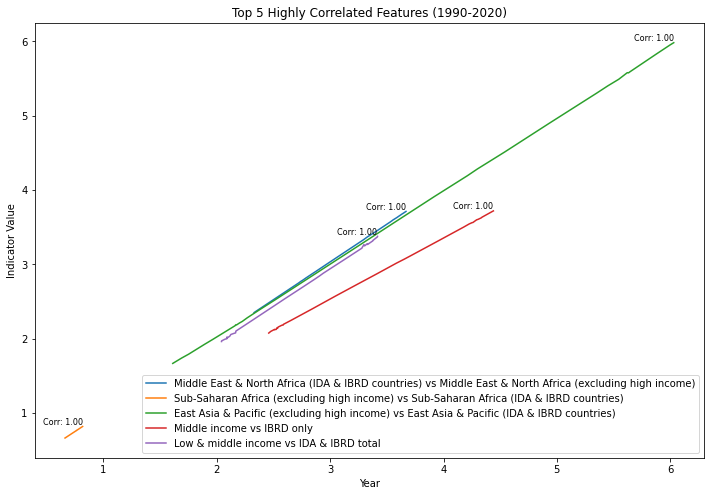

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for the years 1990 to 2020
years_subset_df = transposed_df.loc['1990':'2020']

# Compute the correlation matrix
correlation_matrix = years_subset_df.corr()

# Find the top 5 highly correlated features
top_correlated_features = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(6)[1:]

# Plot the top 5 highly correlated features
plt.figure(figsize=(12, 8))
for feature in top_correlated_features.index:
    sns.lineplot(data=years_subset_df, x=feature[1], y=feature[0], label=f'{feature[0]} vs {feature[1]}')

    # Annotate the plot with the correlation value
    correlation_value = correlation_matrix.loc[feature[0], feature[1]]
    plt.text(years_subset_df[feature[1]].max(), years_subset_df[feature[0]].max(), f'Corr: {correlation_value:.2f}',
             fontsize=8, ha='right', va='bottom')

plt.title('Top 5 Highly Correlated Features (1990-2020)')
plt.xlabel('Year')
plt.ylabel('Indicator Value')
plt.legend()
plt.show()

## Global Trends in CO2 Emissions (1990-2020)

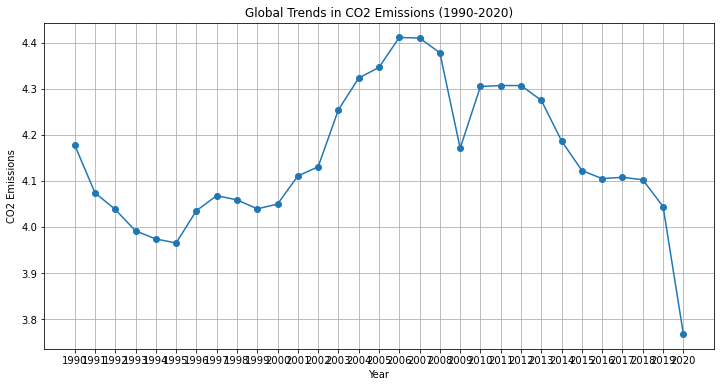

In [150]:
# Filter the DataFrame for the years 1990 to 2020
years_subset_df = transposed_df.loc['1990':'2020']

# 1. Global Trends in CO2 Emissions
plt.figure(figsize=(12, 6))
plt.plot(years_subset_df.mean(axis=1), marker='o')
plt.title('Global Trends in CO2 Emissions (1990-2020)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.grid(True)
plt.show()

## Top 10 Countries with Highest Mean CO2 Emissions

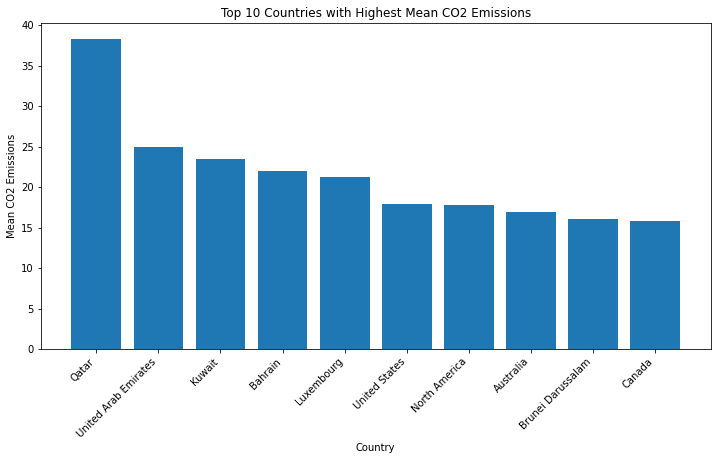

In [151]:
# Calculate the mean CO2 emissions for each country
mean_values = transposed_df.mean()

# Find the top 10 countries with the highest mean CO2 emissions
top_countries = mean_values.nlargest(10)

# Plot the mean CO2 emissions for the top 10 countries with country names at the bottom
plt.figure(figsize=(12, 6))
bars = plt.bar(top_countries.index, top_countries.values)
plt.title('Top 10 Countries with Highest Mean CO2 Emissions')
plt.xlabel('Country')
plt.ylabel('Mean CO2 Emissions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

## Top 10 Countries with Highest Increase in CO2 Emissions (1990 to 2020)

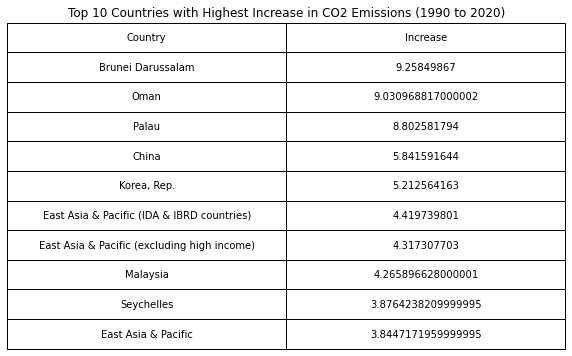

In [152]:
# Select the specific years (1990, 2000, 2020)
selected_years = transposed_df.loc[['1990', '2000', '2020']]

# Calculate the increase in CO2 emissions for each country
increase_values = selected_years.loc['2020'] - selected_years.loc['1990']

# Find the top 10 countries with the highest increase in CO2 emissions
top_increasing_countries = increase_values.nlargest(10)

# Create a DataFrame with country names and their corresponding increase values
table_data = pd.DataFrame({'Country': top_increasing_countries.index, 'Increase': top_increasing_countries.values})

# Plot the table
plt.figure(figsize=(10, 6))
plt.table(cellText=table_data.values,
          colLabels=table_data.columns,
          cellLoc='center',
          loc='center',
          bbox=[0, 0, 1, 1])
plt.axis('off')  # Hide axis labels

plt.title('Top 10 Countries with Highest Increase in CO2 Emissions (1990 to 2020)')
plt.show()

## Agriculture Forestry Dataset

In [153]:
df_agr = pd.read_csv("Agr_Forestry.csv")

In [154]:
df_agr

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.017817,0.014812,0.012519,0.018611,0.023921,0.022253,0.027573,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.597094,12.522304,13.552897,13.715726,13.436438,11.946077,12.683949,14.645469,13.416948,13.921312
2,Afghanistan,AFG,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.810663,22.137041,20.634323,25.740314,26.420199,22.042897,25.773971,26.820600,33.484499,NaN
3,Africa Western and Central,AFW,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,19.705775,19.252100,20.286493,20.593680,20.453915,20.510893,20.808013,22.533478,21.665678,21.889064
4,Angola,AGO,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.507492,7.547057,9.122534,9.831169,10.016996,8.607742,7.882625,9.946544,11.485905,13.649109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.431611,8.298706,7.677168,8.171523,7.408720,6.531164,7.238670,7.362010,6.923306,7.386859
262,"Yemen, Rep.",YEM,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,14.550004,14.570191,14.066737,20.052885,18.932940,17.183127,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,9.041447,9.317147,8.958631,8.83529,7.646370,7.434387,...,1.926849,2.125749,2.233978,2.414186,2.493799,2.266089,1.962138,2.520639,2.467610,2.570586
264,Zambia,ZMB,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,11.460629,12.761592,12.345425,13.01928,11.980939,14.313984,...,8.226523,6.779598,4.980837,6.228472,4.024271,3.341124,2.860775,2.977086,3.393277,3.388658


## Data Cleaning

In [155]:
# Set the threshold for null values
threshold = 100

# Drop columns with null values greater than the threshold
df_clean = df_agr.dropna(axis=1, thresh=df_agr.shape[0] - threshold)

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
df_clean

Cleaned DataFrame:


,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,0.505922,...,0.017817,0.014812,0.012519,0.018611,0.023921,0.022253,0.027573,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,17.524889,18.869777,12.147817,12.547368,12.374294,12.001617,...,11.597094,12.522304,13.552897,13.715726,13.436438,11.946077,12.683949,14.645469,13.416948,13.921312
2,Afghanistan,AFG,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.810663,22.137041,20.634323,25.740314,26.420199,22.042897,25.773971,26.820600,33.484499,NaN
3,Africa Western and Central,AFW,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,24.586521,24.891813,24.699526,24.504983,25.149438,25.346186,...,19.705775,19.252100,20.286493,20.593680,20.453915,20.510893,20.808013,22.533478,21.665678,21.889064
4,Angola,AGO,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,6.653214,...,6.507492,7.547057,9.122534,9.831169,10.016996,8.607742,7.882625,9.946544,11.485905,13.649109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.431611,8.298706,7.677168,8.171523,7.408720,6.531164,7.238670,7.362010,6.923306,7.386859
262,"Yemen, Rep.",YEM,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,24.381140,23.124134,24.177531,22.553139,24.961814,20.533833,...,14.550004,14.570191,14.066737,20.052885,18.932940,17.183127,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,3.777056,3.743505,3.149210,3.422575,3.755448,3.121585,...,1.926849,2.125749,2.233978,2.414186,2.493799,2.266089,1.962138,2.520639,2.467610,2.570586
264,Zambia,ZMB,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,18.202576,15.814030,21.267549,30.478730,11.826503,14.089372,...,8.226523,6.779598,4.980837,6.228472,4.024271,3.341124,2.860775,2.977086,3.393277,3.388658


In [156]:
# Check for null values in the DataFrame
null_values = df_clean.isnull().sum()

# Display the columns with null values and their counts
print("Null Values in Each Column:")
print(null_values[null_values > 0])

Null Values in Each Column:
1990    96
1991    93
1992    91
1993    86
1994    79
1995    52
1996    50
1997    44
1998    43
1999    42
2000    33
2001    32
2002    30
2003    28
2004    28
2005    29
2006    25
2007    25
2008    23
2009    22
2010    22
2011    21
2012    19
2013    18
2014    18
2015    18
2016    18
2017    18
2018    20
2019    21
2020    25
2021    36
2022    77
dtype: int64


In [157]:
# Fill NaN values with the mean of each column
data_agr = df_clean.fillna(df_agr.mean())

# Display the DataFrame with NaN values filled with mean
print("DataFrame with NaN Values Filled with Mean:")

DataFrame with NaN Values Filled with Mean:


In [158]:
data_agr

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,18.690796,18.457237,17.907811,17.171965,17.159025,0.505922,...,0.017817,0.014812,0.012519,0.018611,0.023921,0.022253,0.027573,10.449112,9.909806,9.828272
1,Africa Eastern and Southern,AFE,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,17.524889,18.869777,12.147817,12.547368,12.374294,12.001617,...,11.597094,12.522304,13.552897,13.715726,13.436438,11.946077,12.683949,14.645469,13.416948,13.921312
2,Afghanistan,AFG,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,18.690796,18.457237,17.907811,17.171965,17.159025,15.644278,...,22.810663,22.137041,20.634323,25.740314,26.420199,22.042897,25.773971,26.820600,33.484499,9.828272
3,Africa Western and Central,AFW,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,24.586521,24.891813,24.699526,24.504983,25.149438,25.346186,...,19.705775,19.252100,20.286493,20.593680,20.453915,20.510893,20.808013,22.533478,21.665678,21.889064
4,Angola,AGO,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,18.690796,18.457237,17.907811,17.171965,17.159025,6.653214,...,6.507492,7.547057,9.122534,9.831169,10.016996,8.607742,7.882625,9.946544,11.485905,13.649109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,18.690796,18.457237,17.907811,17.171965,17.159025,15.644278,...,8.431611,8.298706,7.677168,8.171523,7.408720,6.531164,7.238670,7.362010,6.923306,7.386859
262,"Yemen, Rep.",YEM,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,24.381140,23.124134,24.177531,22.553139,24.961814,20.533833,...,14.550004,14.570191,14.066737,20.052885,18.932940,17.183127,9.770617,10.449112,9.909806,9.828272
263,South Africa,ZAF,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,3.777056,3.743505,3.149210,3.422575,3.755448,3.121585,...,1.926849,2.125749,2.233978,2.414186,2.493799,2.266089,1.962138,2.520639,2.467610,2.570586
264,Zambia,ZMB,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,18.202576,15.814030,21.267549,30.478730,11.826503,14.089372,...,8.226523,6.779598,4.980837,6.228472,4.024271,3.341124,2.860775,2.977086,3.393277,3.388658


In [159]:
# Check for NaN values in the entire DataFrame
nan_values = data_agr.isna().sum().sum()

if nan_values == 0:
    print("No NaN values found in the DataFrame.")
else:
    print(f"Found {nan_values} NaN values in the DataFrame.")

No NaN values found in the DataFrame.


In [160]:
data_agr = data_agr.drop([ 'Country Code', 'Indicator Name', 'Indicator Code','2021','2022'], axis=1).reset_index(drop=True)

In [161]:
data_agr

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,18.690796,18.457237,17.907811,17.171965,17.159025,0.505922,0.485830,0.429978,0.407917,...,0.020394,0.021470,0.017817,0.014812,0.012519,0.018611,0.023921,0.022253,0.027573,10.449112
1,Africa Eastern and Southern,17.524889,18.869777,12.147817,12.547368,12.374294,12.001617,12.521699,13.150215,13.270526,...,10.525978,11.445682,11.597094,12.522304,13.552897,13.715726,13.436438,11.946077,12.683949,14.645469
2,Afghanistan,18.690796,18.457237,17.907811,17.171965,17.159025,15.644278,15.571020,14.912443,14.692817,...,23.743664,24.390874,22.810663,22.137041,20.634323,25.740314,26.420199,22.042897,25.773971,26.820600
3,Africa Western and Central,24.586521,24.891813,24.699526,24.504983,25.149438,25.346186,24.406516,24.779468,25.307008,...,20.663950,20.575230,19.705775,19.252100,20.286493,20.593680,20.453915,20.510893,20.808013,22.533478
4,Angola,18.690796,18.457237,17.907811,17.171965,17.159025,6.653214,7.026869,9.002018,12.911182,...,5.845681,6.069630,6.507492,7.547057,9.122534,9.831169,10.016996,8.607742,7.882625,9.946544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,18.690796,18.457237,17.907811,17.171965,17.159025,15.644278,15.571020,14.912443,14.692817,...,8.132568,7.445458,8.431611,8.298706,7.677168,8.171523,7.408720,6.531164,7.238670,7.362010
262,"Yemen, Rep.",24.381140,23.124134,24.177531,22.553139,24.961814,20.533833,16.728127,16.191402,19.563414,...,8.533169,14.856279,14.550004,14.570191,14.066737,20.052885,18.932940,17.183127,9.770617,10.449112
263,South Africa,3.777056,3.743505,3.149210,3.422575,3.755448,3.121585,3.416588,3.265895,3.034180,...,2.043893,1.976710,1.926849,2.125749,2.233978,2.414186,2.493799,2.266089,1.962138,2.520639
264,Zambia,18.202576,15.814030,21.267549,30.478730,11.826503,14.089372,13.298245,13.982548,15.868411,...,9.648058,9.321640,8.226523,6.779598,4.980837,6.228472,4.024271,3.341124,2.860775,2.977086


In [162]:
data_agr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   1990          266 non-null    float64
 2   1991          266 non-null    float64
 3   1992          266 non-null    float64
 4   1993          266 non-null    float64
 5   1994          266 non-null    float64
 6   1995          266 non-null    float64
 7   1996          266 non-null    float64
 8   1997          266 non-null    float64
 9   1998          266 non-null    float64
 10  1999          266 non-null    float64
 11  2000          266 non-null    float64
 12  2001          266 non-null    float64
 13  2002          266 non-null    float64
 14  2003          266 non-null    float64
 15  2004          266 non-null    float64
 16  2005          266 non-null    float64
 17  2006          266 non-null    float64
 18  2007          266 non-null    

In [163]:
# Transpose the DataFrame
transposed_agr = data_agr.set_index('Country Name').T

In [164]:
transposed_agr

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Viet Nam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1990,18.690796,17.524889,18.690796,24.586521,18.690796,18.690796,18.690796,10.368070,1.058428,8.123676,...,18.690796,38.736742,19.581162,5.100612,18.690796,18.690796,24.381140,3.777056,18.202576,14.832047
1991,18.457237,18.869777,18.457237,24.891813,18.457237,18.457237,18.457237,12.276649,1.297768,6.716492,...,18.457237,40.489134,15.534801,4.618333,18.457237,18.457237,23.124134,3.743505,15.814030,13.546906
1992,17.907811,12.147817,17.907811,24.699526,17.907811,17.907811,17.907811,9.205482,1.378621,5.990787,...,17.907811,33.938588,15.196761,4.078328,17.907811,17.907811,24.177531,3.149210,21.267549,6.751570
1993,17.171965,12.547368,17.171965,24.504983,17.171965,17.171965,17.171965,9.242487,1.480901,5.136826,...,17.171965,29.869954,16.955202,3.852368,17.171965,17.171965,22.553139,3.422575,30.478730,13.737908
1994,17.159025,12.374294,17.159025,25.149438,17.159025,17.159025,17.159025,10.208962,1.830425,5.082668,...,17.159025,27.427829,15.277165,3.889407,22.082747,17.159025,24.961814,3.755448,11.826503,17.080077
1995,0.505922,12.001617,15.644278,25.346186,6.653214,15.644278,15.644278,10.371436,1.787068,5.351465,...,15.644278,27.182689,15.425893,3.837579,17.778127,15.644278,20.533833,3.121585,14.089372,13.465969
1996,0.485830,12.521699,15.571020,24.406516,7.026869,36.410864,15.571020,10.454321,1.792432,5.610866,...,15.571020,27.758826,16.510274,3.959184,18.134902,15.571020,16.728127,3.416588,13.298245,19.342623
1997,0.429978,13.150215,14.912443,24.779468,9.002018,31.543444,14.912443,9.877335,2.004022,5.221972,...,14.912443,25.771707,15.709043,3.847567,20.161692,14.912443,16.191402,3.265895,13.982548,16.695731
1998,0.407917,13.270526,14.692817,25.307008,12.911182,28.785650,14.692817,11.155945,2.180890,5.252723,...,14.692817,25.780780,26.098006,3.719677,18.414174,14.692817,19.563414,3.034180,15.868411,18.890320
1999,0.383268,12.324356,14.013205,24.088591,6.290257,25.918746,14.013205,9.735452,2.333245,4.457826,...,14.013205,25.434438,24.846067,3.512199,15.984038,14.013205,16.434829,2.846399,18.189972,15.481267


##  Statistical Paramerters

In [165]:
# Filter the DataFrame for the years 1990 to 2020
years_subset_agr = transposed_agr.loc['1990':'2020']

# Explore summary statistics using .describe() method
summary_stats = years_subset_agr.describe()

# Additional statistical methods (e.g., mean and median)
mean_values = years_subset_agr.mean()
median_values = years_subset_agr.median()

In [166]:
# Find the top 10 countries with the highest mean values
top_mean_countries = mean_values.mean(level=0).nlargest(10)

# Find the top 10 countries with the highest median values
top_median_countries = median_values.median(level=0).nlargest(10)

In [167]:
# Display the results
print("Summary Statistics:")
summary_stats

Summary Statistics:


Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Viet Nam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,3.304166,12.535321,22.798844,23.137173,8.963178,20.516198,5.620417,7.813063,1.314680,6.300852,...,12.847664,21.603501,19.864410,3.847711,13.035646,11.868908,15.317798,2.661875,12.321651,13.113047
std,6.762032,1.897688,6.847288,2.470622,4.364750,4.607229,7.632111,2.212814,0.591837,1.522702,...,2.805300,7.525799,3.998086,0.430665,4.169876,3.814894,5.123700,0.569208,5.952432,4.471331
min,0.012519,9.796517,12.963340,19.252100,4.805339,15.644278,0.353522,4.604402,0.627944,4.457826,...,9.770617,11.784526,9.770617,3.213357,8.323954,6.531164,8.162181,1.926849,2.860775,6.751570
25%,0.017924,11.521388,17.165495,20.735982,6.124962,17.931839,0.430536,5.685764,0.756310,5.226797,...,10.539661,15.295343,16.732738,3.448380,9.451635,8.223829,10.500728,2.179863,8.774081,8.705585
50%,0.020492,12.521699,22.810663,23.268669,7.026869,18.845309,0.537623,7.781178,1.094244,5.990787,...,11.774409,20.413144,20.984962,3.877757,11.237405,11.774409,14.550004,2.520639,13.206271,13.546906
75%,0.457904,12.973556,26.620400,24.643024,9.888856,21.257872,14.802630,9.566311,1.811428,7.065451,...,14.802630,25.776244,22.625009,4.108192,17.475046,14.802630,19.248177,3.077883,15.599021,16.887904
max,18.690796,18.869777,38.627892,30.176281,18.690796,36.410864,18.690796,12.276649,2.333245,10.328167,...,18.690796,40.489134,26.098006,5.100612,22.082747,18.690796,24.961814,3.777056,30.478730,21.197689


In [168]:
# Display the results
print("Top 10 Countries with Highest Mean Values:")
top_mean_countries

Top 10 Countries with Highest Mean Values:


Country Name
Sierra Leone       50.836403
Guinea-Bissau      45.797237
Ethiopia           44.087992
Liberia            41.384236
Burundi            39.802336
Solomon Islands    37.550808
Niger              35.315231
Mali               35.172718
Sudan              34.045815
Nepal              33.540687
dtype: float64

In [169]:
print("Top 10 Countries with Highest Median Values:")
top_median_countries

Top 10 Countries with Highest Median Values:


Country Name
Sierra Leone       51.792291
Guinea-Bissau      45.088047
Ethiopia           42.340571
Burundi            40.732325
Liberia            36.499083
Mali               36.188045
Niger              35.262958
Ghana              35.148377
Sudan              34.530704
Solomon Islands    33.968756
dtype: float64

## Top 5 Correlated Countries between CO2 Emissions and Agriculture

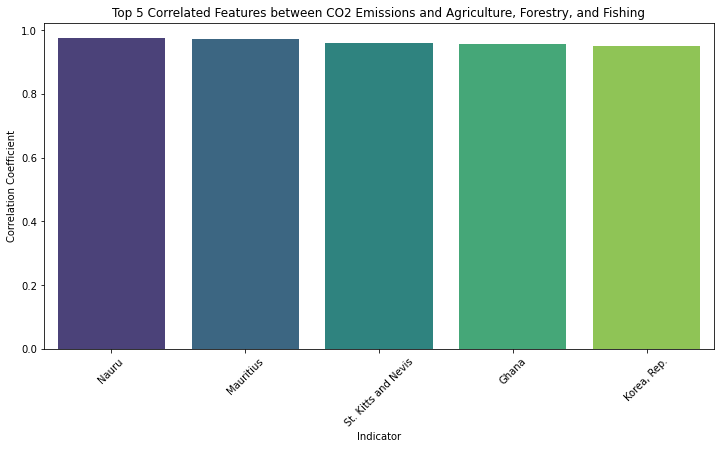

Top 5 Correlated Features:
Country Name                                       Country Name                                      
Middle East & North Africa (IDA & IBRD countries)  Middle East & North Africa (excluding high income)    0.999998
Sub-Saharan Africa (excluding high income)         Sub-Saharan Africa (IDA & IBRD countries)             0.999996
East Asia & Pacific (excluding high income)        East Asia & Pacific (IDA & IBRD countries)            0.999986
Middle income                                      IBRD only                                             0.999976
Low & middle income                                IDA & IBRD total                                      0.999913
dtype: float64


In [170]:
# Compute the correlation matrix between the two datasets
correlation_both = transposed_df.corrwith(transposed_agr)

# Get the top 5 correlated features
top5_correlated = correlation_both.abs().nlargest(5)

# Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=top5_correlated.index, y=top5_correlated.values, palette='viridis')
plt.title('Top 5 Correlated Features between CO2 Emissions and Agriculture, Forestry, and Fishing')
plt.xlabel('Indicator')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

# Print the top 5 correlated features
print("Top 5 Correlated Features:")
print(top_correlated_features)

In [171]:
transposed_agr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 1990 to 2020
Columns: 266 entries, Aruba to Zimbabwe
dtypes: float64(266)
memory usage: 65.9+ KB


## Top 10 Countries with Highest Mean Agriculture, Forestry, and Fishing values

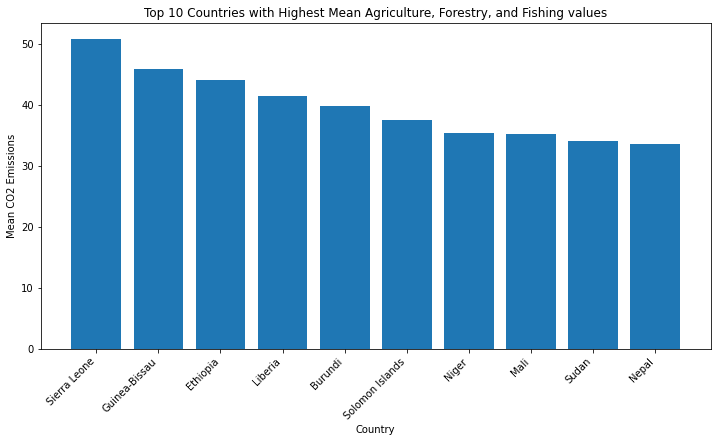

In [172]:
# Calculate the mean CO2 emissions for each country
mean_values = transposed_agr.mean()

# Find the top 10 countries with the highest mean CO2 emissions
top_countries = mean_values.nlargest(10)

# Plot the mean CO2 emissions for the top 10 countries with country names at the bottom
plt.figure(figsize=(12, 6))
bars = plt.bar(top_countries.index, top_countries.values)
plt.title('Top 10 Countries with Highest Mean Agriculture, Forestry, and Fishing values')
plt.xlabel('Country')
plt.ylabel('Mean CO2 Emissions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

## United States CO2 Emissions vs. Agriculture, Forestry, and Fishing

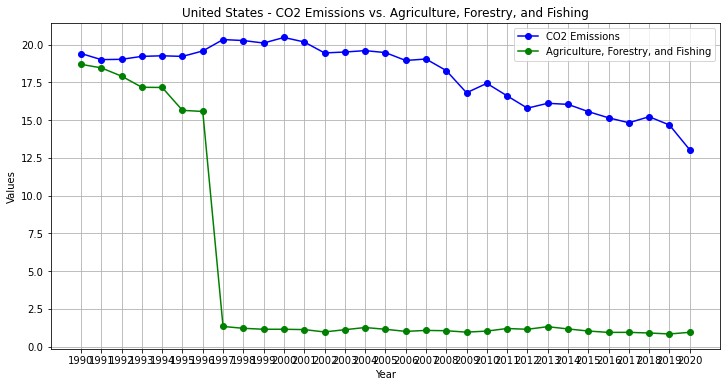

In [173]:
# Select a specific country for comparison
country_to_compare = 'United States'

# Extract data for the selected country
co2_data = transposed_df[country_to_compare]
agr_data = transposed_agr[country_to_compare]

# Plotting the data with different colors
plt.figure(figsize=(12, 6))
plt.plot(co2_data, label='CO2 Emissions', marker='o', color='blue')
plt.plot(agr_data, label='Agriculture, Forestry, and Fishing', marker='o', color='green')
plt.title(f'{country_to_compare} - CO2 Emissions vs. Agriculture, Forestry, and Fishing')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

## Comparison of Mean CO2 Emissions and Agriculture for Top 5 Countries

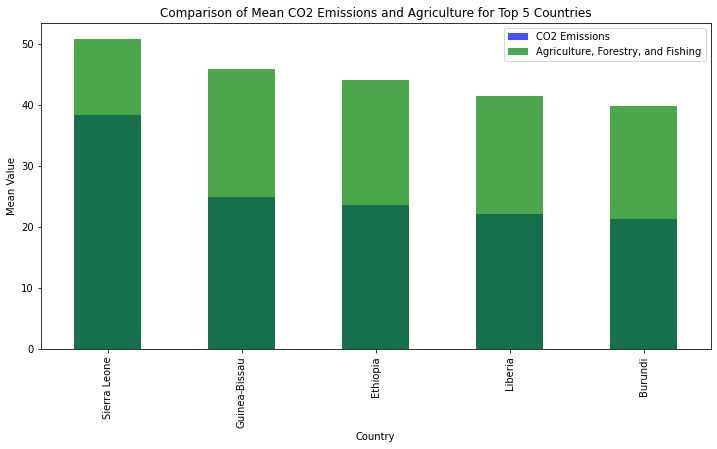

In [174]:
# Get the mean values for CO2 emissions and Agriculture, Forestry, and Fishing
mean_co2 = transposed_df.mean()
mean_agr = transposed_agr.mean()

# Get the top 5 countries for CO2 emissions
top5_co2 = mean_co2.nlargest(5)

# Get the top 5 countries for Agriculture, Forestry, and Fishing
top5_agr = mean_agr.nlargest(5)

# Plot both on the same graph
plt.figure(figsize=(12, 6))

# Plot CO2 emissions
top5_co2.plot(kind='bar', color='blue', alpha=0.7, label='CO2 Emissions')

# Plot Agriculture, Forestry, and Fishing
top5_agr.plot(kind='bar', color='green', alpha=0.7, label='Agriculture, Forestry, and Fishing')

plt.title('Comparison of Mean CO2 Emissions and Agriculture for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Mean Value')
plt.legend()
plt.show()

## Bottom 5 Countries with Lowest Mean CO2 Emissions and Agriculture, Forestry, and Fishing Values (1990-2020)

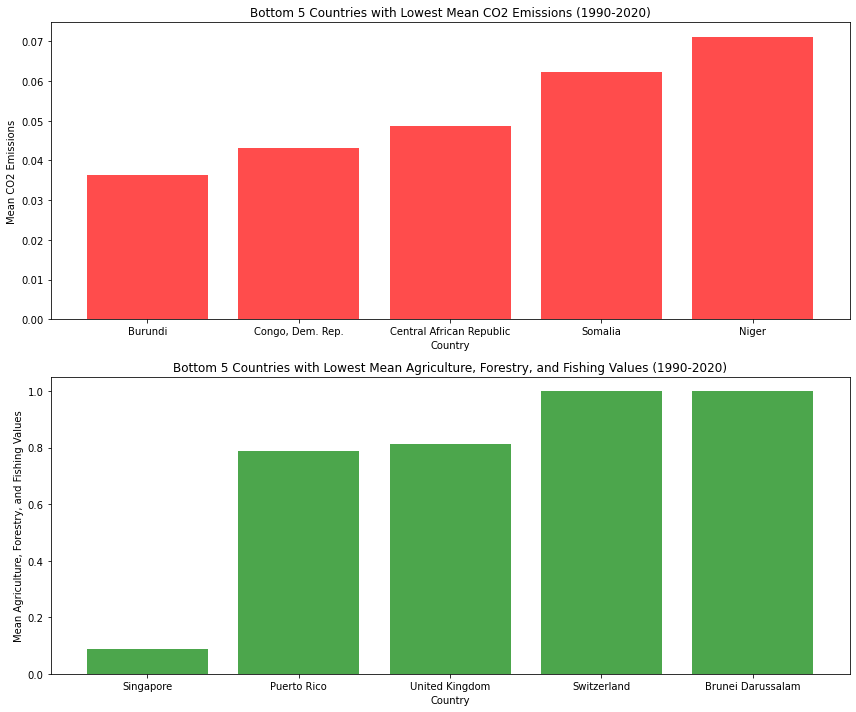

In [175]:
# Calculate the mean values for CO2 emissions
mean_co2 = transposed_df.mean()

# Get the bottom 5 countries for CO2 emissions
bottom5_co2 = mean_co2.nsmallest(5)

# Calculate the mean values for Agriculture, Forestry, and Fishing
mean_agr = transposed_agr.mean()

# Get the bottom 5 countries for Agriculture, Forestry, and Fishing
bottom5_agr = mean_agr.nsmallest(5)

# Plot lowest CO2 emissions and Agriculture, Forestry, and Fishing values vertically
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot lowest CO2 emissions
axes[0].bar(bottom5_co2.index, bottom5_co2, color='red', alpha=0.7)
axes[0].set_title('Bottom 5 Countries with Lowest Mean CO2 Emissions (1990-2020)')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Mean CO2 Emissions')

# Plot lowest Agriculture, Forestry, and Fishing values
axes[1].bar(bottom5_agr.index, bottom5_agr, color='green', alpha=0.7)
axes[1].set_title('Bottom 5 Countries with Lowest Mean Agriculture, Forestry, and Fishing Values (1990-2020)')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Mean Agriculture, Forestry, and Fishing Values')

plt.tight_layout()
plt.show()

## Global Trends in Agriculture, Forestry, and Fishing Values (1990-2020)

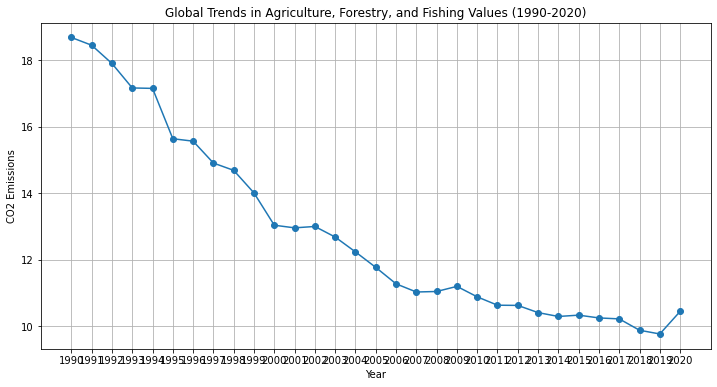

In [176]:
# Filter the DataFrame for the years 1990 to 2020
years_subset_df = transposed_agr.loc['1990':'2020']

plt.figure(figsize=(12, 6))
plt.plot(years_subset_df.mean(axis=1), marker='o')
plt.title('Global Trends in Agriculture, Forestry, and Fishing Values (1990-2020)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.grid(True)
plt.show()